In [1]:
#import library
import numpy as np

In [4]:
np.random.seed(0)
n_arms = 4
class Env(object):
    thetas = [0.1,0.1,0.2,0.3]
    
    def react(arm):
        return 1 if np.random.random() < Env.thetas[arm] else 0
    
    def opt():
        return np.argmax(Env.thetas)

In [28]:
class EpsilonGreedyAgent(object):
    
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        
    def get_arm(self):
        if np.random.random() < self.epsilon:
            arm = np.random.randint(n_arms)
        else:
            arm = np.argmax(self.values)
        return arm
    
    def sample(self, arm, reward):
        self.counts[arm] +=1
        self.values[arm] = (
            (self.counts[arm] -1) * self.values[arm] + reward) / self.counts[arm]

In [33]:
def sim(Agent, N = 1000, T= 1000, ** kwargs):
    selected_arms = [[0 for _ in range(T)] for _ in range(N)]
    earned_rewards = [[0 for _ in range(T)] for _ in range(N)]
    
    for n in range(N):
        agent = Agent(**kwargs)
        for t in range(T):
            arm = agent.get_arm()
            reward = Env.react(arm)
            agent.sample(arm, reward)
            selected_arms[n][t] = arm
            earned_rewards[n][t] = reward
    return np.array(selected_arms), np.array(earned_rewards)

In [34]:
arms_eg, rewards_eg = sim(EpsilonGreedyAgent)
acc = np.mean(arms_eg == Env.opt(), axis = 0)

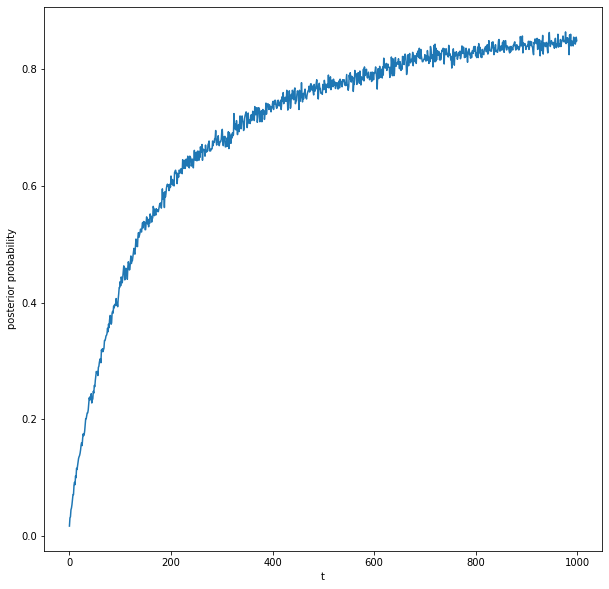

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(acc)
plt.xlabel('t')
plt.ylabel('posterior probability')
plt.show()